In [1]:
#import SAIRD_Feedback as SAIRD_fm
import SIRD_Model as sird
import SIRD_Feedback_Delay as sird_fb_delay

import numpy as np
import csv
import matplotlib.pyplot as plt
import platform

In [2]:
sird_fb_delay.regularizer = 10
sird_fb_delay.weightDecay = .9

sird_fb_delay.delay = 14

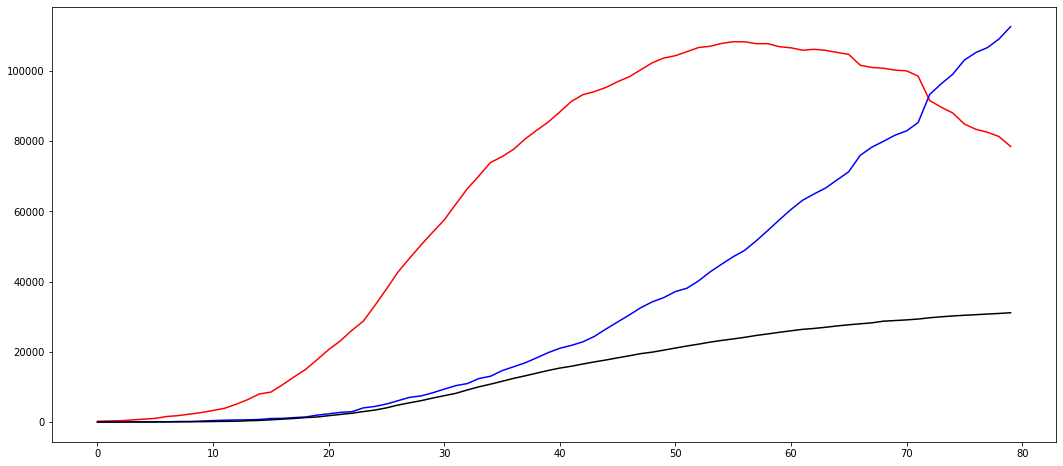

In [3]:
pathc = "../Data/Italian Data/"
#pathc="../Data/Covid Tracking State Data/"
if platform.system() == "Windows":
    pathc.replace("/", "\\")
    
filename = "National Data.csv"
#filename = "AZ.csv"
dates, infectRaw, recovRaw, deadRaw = sird.loadData(pathc + filename)
#recovRaw = SIRD_Model.approxRecovered(infectRaw, deadRaw)
#infectRaw = infectRaw - deadRaw - recovRaw

#set up day range
pop = 60000000 #for italy
skipDays = 0
numDays = 80 #len(infectRaw) #just to get initial beginning data
daysToPredict = 45
#asympt = asymptRaw[skipDays:numDays]
infect = infectRaw[skipDays:numDays]
recov = recovRaw[skipDays:numDays] 
dead = deadRaw[skipDays:numDays]


fig, ax = plt.subplots(figsize=(18,8))
ax.plot(infect, "red")
ax.plot(recov, "blue")
ax.plot(dead, "black")

[0.017520127125975424, 0.26533940802041717, 0.029276175897977236, 0.003010706406567371]
[[  0.         -34.62600198   6.47003487  -2.33463388]]
[[ 0.         -0.53948761  0.10080585 -0.03637457]]

[[ 0.          3.92302894  7.1048907  -1.06367031]]
[[ 0.          0.0644287   0.11668506 -0.01746887]]

[[   0.         -106.53729233  -30.72867228   -3.84087803]]
[[ 0.         -1.84432846 -0.53196175 -0.06649165]]

[[  0.         -85.68138871  16.21439143  -2.22970463]]
[[ 0.         -1.56351429  0.29588027 -0.04068766]]

[[  0.         -22.31515386  20.03574041  -5.52821004]]
[[ 0.         -0.42923388  0.38538916 -0.10633559]]

[[   0.         -265.20691651   -2.28929148   -1.84176898]]
[[ 0.         -5.37721864 -0.04641667 -0.0373429 ]]

[[  0.         137.02284275 -19.83147061 -13.252116  ]]
[[ 0.          2.92849555 -0.42384446 -0.28322842]]

[[  0.          31.62449794  42.72178277 -21.47535374]]
[[ 0.          0.71244932  0.96245339 -0.48380535]]

[[  0.         123.77777177 -49.7480

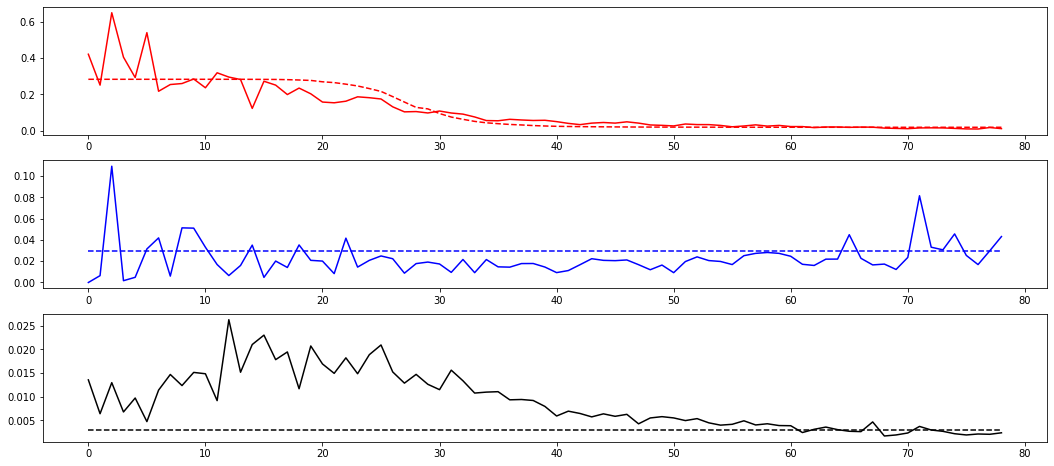

In [4]:

q = .09
betaNonLin = [800, 2]

linVars = sird_fb_delay.getLinVars(infect,recov,dead, q,pop, betaNonLin)

timeVars, figVars, axVars = sird.solveTimeVars(q,pop, infect, recov, dead, graph=True)

print(linVars)

betaTime = sird_fb_delay.calculateBeta(betaNonLin, linVars, q,pop, infect)
axVars[0].plot(betaTime, color="red", linestyle='dashed')
gammaExtended = np.ones(len(timeVars[1]))*linVars[-2] #make list of length T for constant line ploting
axVars[1].plot(gammaExtended, color="blue", linestyle='dashed')
nuExtended = np.ones(len(timeVars[2]))*linVars[-1] #make list of length T for constant line ploting
axVars[2].plot(nuExtended, color="black", linestyle='dashed')


print(sird_fb_delay.errorFunc(betaNonLin, linVars, q, pop, infect, recov, dead))

In [38]:
qConstraint = (.09, .09) #(.01, 1)
b1Constraint = (0, 1000)
b2Constraint = (1, 10)

varResolution = [1, 25, 25]
nonLinConstrain = [qConstraint, b1Constraint, b2Constraint]

nonLinVars, linVars = sird_fb_delay.solveAllVars(nonLinConstrain, varResolution, pop, infect, recov, dead)

q = nonLinVars[0]
betaNonLin = nonLinVars[1:]

Solution: 
q:   0.09
b2:  0
b3:  1
b0:  0.017321389261915197
b1:  0.017321389261915204
g:   0.0224481214619862
nu:  0.005241644359216902
cost:  0.623325443450335

